<img src="https://i.esdrop.com/d/7o0dj05m8rnz/JNGCMedl18.png" width="45%">

# Chi-square test of independence 

### Cramer's V 

|Cramer's V|Effect Size|
|:---|:---|
|0.01 ~ 0.09|Very Small|
|0.10 ~ 0.29|Small|
|0.30 ~ 0.49|Medium|
|0.50 ~ 0.69|Large|
|0.70 and above|Very Large|

---

## Import Packages
- Visual Python: Data Analysis > Import

In [1]:
# Visual Python: Data Analysis > Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from matplotlib import rcParams
rcParams['font.family'] = 'New Gulim'
rcParams['axes.unicode_minus'] = False

## 1 Chi-square test of independence

In [3]:
# Visual Python: Data Analysis > File
df = pd.read_csv('./data/07_1_교차분석.csv')
df

,세탁기크기,가족규모
0,소형,1-2명
1,소형,1-2명
2,소형,1-2명
3,소형,1-2명
4,소형,1-2명
...,...,...
295,대형,5명이상
296,대형,5명이상
297,대형,5명이상
298,대형,5명이상


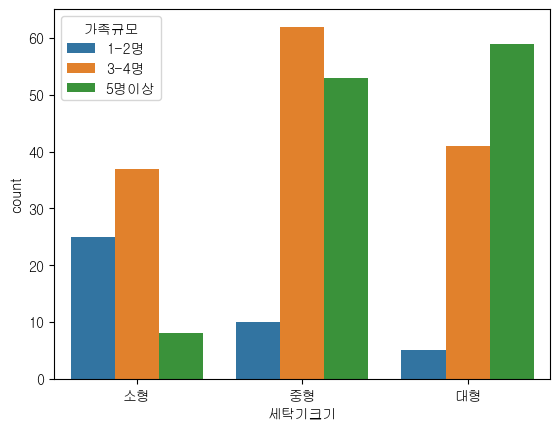

### Cross tabulation

가족규모                  1-2명   3-4명   5명이상  Total
세탁기크기                                          
대형    Count            5.0   41.0   59.0  105.0
      Expected count  14.0   49.0   42.0  105.0
소형    Count           25.0   37.0    8.0   70.0
      Expected count   9.3   32.7   28.0   70.0
중형    Count           10.0   62.0   53.0  125.0
      Expected count  16.7   58.3   50.0  125.0
Total Count           40.0  140.0  120.0  300.0
      Expected count  40.0  140.0  120.0  300.0

### Chi-square test

,Value,df,p-value(two-sided)
Pearson Chi-square,58.208095,4.0,6.900771e-12
Likelihood ratio,57.148587,4.0,1.151480e-11
N of valid cases,300.000000,NaN,NaN


### Cramers V coefficient

,Value
Cramers V coefficient,0.31147


In [4]:
# Visual Python: Chi-square test
vp_df = df.dropna().copy()

# Count plot
import seaborn as sns
import warnings
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=Warning)
    sns.countplot(data=vp_df, x='세탁기크기', hue='가족규모')
    plt.show()

# Chi-square test of independence
from IPython.display import display, Markdown
from scipy import stats
_obs  = pd.crosstab(index=vp_df['세탁기크기'], columns=vp_df['가족규모'])
_res1 = stats.chi2_contingency(_obs)
_res2 = stats.chi2_contingency(_obs, lambda_='log-likelihood')

# Cross tabulation: Count
_dfc = pd.crosstab(index=vp_df['세탁기크기'],columns=vp_df['가족규모'],margins=True,margins_name='Total')
_dfc = _dfc.reset_index().reset_index()
_dfc[' '] = 'Count'

# Cross tabulation: Expected count
_dfe = pd.DataFrame(_res1.expected_freq, index=_obs.index, columns=_obs.columns).round(1)
_dfe.loc['Total',:] = _dfe.sum(axis=0)
_dfe.loc[:,'Total'] = _dfe.sum(axis=1)
_dfe = _dfe.reset_index().reset_index()
_dfe[' '] = 'Expected count'

# Cross tabulation: Count + Expected count
display(Markdown('### Cross tabulation'))
display(pd.concat([_dfc, _dfe]).set_index(['세탁기크기',' ']).sort_values('index').drop('index',axis=1))

# Chi-square test
display(Markdown('### Chi-square test'))
display(pd.DataFrame(data = {'Value':[_res1.statistic,_res2.statistic,vp_df.dropna().shape[0]],
                             'df':[_res1.dof,_res2.dof,np.nan],
                             'p-value(two-sided)':[_res1.pvalue,_res2.pvalue,np.nan]},
                     index= ['Pearson Chi-square','Likelihood ratio','N of valid cases']))

# Cramers' V coefficient
_X2 = stats.chi2_contingency(_obs)[0]
_sum = _obs.sum().sum()
_minDim = min(_obs.shape)-1
display(Markdown('### Cramers V coefficient'))
display(pd.DataFrame(data={'Value':np.sqrt((_X2/_sum) / _minDim)}, index=['Cramers V coefficient']))

---

In [5]:
# End of file